# Máquina de Atwood

![UNLaM | DIIT](figuras/ambos.png)    
© 2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza  

---

## Enunciado
1. Obtenga con la ecuación de Euler-Lagrange la ecuación de la dinámica. 
Simplifique el problema considerando que la poleas de radio \\(R\\) tiene masa nula (\\(M=0\\)).
2. Compare las aceleraciones con las obtenidas usando ecuaciones de Newton.  
![](figuras/marion_fig2_1a.png)


## Análisis preliminar
- Dos coordenadas generalizadas: $x_1,x_2$
- Potencial externo: debido a la aceleración gravitatoria
- Vínculo: cuerda de longitud $l$ impone $x_1+ x_2 + \pi R = \ell$ siendo $R$ el radio de la polea que se la considera sin masa.
    - Eso reduce a uno l

## Resolución simbólica en el formalismo Lagrangiano
A continuación se obtiene la ecuación Lagrangiana, sino que también se resolverá la correspondiente de Euler-Lagrange con las funciones del módulo `sympy`.

In [1]:
import sympy as sym # módulo de cálculo simbólico
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

### Variables

In [2]:
# Defino los parámetros físicos del sistema
M, R, m1, m2, g, l = sym.symbols('M, R, m_1, m_2, g, \ell', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x1 = mech.dynamicsymbols('x_1') # sabemos que solo necesitamos una

# vectores posición
o = mech.ReferenceFrame('o') # sistema de coordenadas
m1_r = x1* (-o.y) # versor y para arriba
m2_r = (l - x1 - sym.pi* R)* (-o.y) # resto longitud hilo x1 y media vuelta polea
m1_r, m2_r

### Energía cinética

In [3]:
# velocidad
m1_v = m1_r.diff(t,o) # se indica que se deriva en sistema de referencia o
m2_v = m2_r.diff(t,o) # se indida que se deriva en sistema de referencia o
m1_v, m2_v

In [4]:
# velocidad al cuadrado
m1_v2 = m1_v.dot(m1_v) # vector producto punto con sigo mismo
m2_v2 = m2_v.dot(m2_v) # vector producto punto con sigo mismo
m1_v2, m2_v2

In [5]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
T_m1 = unMedio* m1* m1_v2
T_m2 = unMedio* m2* m1_v2
T = sym.Eq(sym.Symbol('T'), (T_m1 + T_m2).simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

In [6]:
# Energía potencial
g_vector = g* (-o.y) # aceleración gravitatoria en -y versor
V_m1 = m1* (-g_vector).dot(m1_r)
V_m2 = m2* (-g_vector).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), (V_m1 + V_m2).simplify() )
V

### Lagrangiano
$$
\mathcal{L}(x_1, \dot{x}_1) = T(\dot{x}_1)- V(x_1)
$$

In [7]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify() )
L

### Ecuación de Euler-Lagrange

Primero calculamos el que llamo lado izquierdo
$$
\frac{\partial}{\partial x} \mathcal{L}
$$

In [8]:
ladoIzquierdo = L.rhs.diff(x1)
ladoIzquierdo

Luego el derecho
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} \mathcal{L}
$$

In [9]:
ladoDerecho = L.rhs.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
ladoDerecho

Con ambos se escribe la ecuación de Euler-Lagrange
$$
\frac{\partial}{\partial x} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} \mathcal{L} = 0
$$

In [10]:
eulerLagrange = sym.Eq(ladoIzquierdo- ladoDerecho, 0) # ecuación igualando a cero
eulerLagrange.simplify()

Esta es una ecuación diferencial lineal de segundo orden homogena.

### Despeje
Buscamos resolver numéricamente esta ecuación diferencial de segundo orden.
Podemos despejar $\ddot{x}$

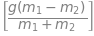

In [11]:
sym.solve(eulerLagrange, x1.diff(t,2) ) # entrega una lista con los posibles despejes en función de x punto punto (derivada de 2.o orden con t)

y asignar este resultado a una variable para uso posterior

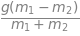

In [12]:
m1_a = sym.solve(eulerLagrange,x1.diff(t,2))[0] # [0] toma el único elemento de la lista
m1_a

Más adelante en el curso ejercitaremos el dar valores numéricos a los parámetros y condiciones iniciales del sistema para poder calcular $x(t)$.

### Contemplando la masa de la polea

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular \\(\omega\\).

In [13]:
I_cilindro = unMedio* M* R**2 # momento de inercia de rotación en torno a su eje de simetría longitudinal
ω = sym.Symbol('\omega') # declaramos ω como variable
T_rotación = unMedio* I_cilindro* ω**2
T_rotación

Conocemos la relación entre la velocidad angular y la tangencial que es la de la cuerda.

In [14]:
sym.Eq(ω , R* x1.diff(t))

Hago uso de la sustitución para re-escribir la componente de energía cinética por la rotación de la polea.

In [15]:
T_rotación = T_rotación.subs(ω, R* x1.diff(t)) # substituye
T_rotación

La nueva energía cinética es ahora

In [17]:
T_p = T.rhs + T_rotación # agrego _p para indicar con polea
T_p

El Lagrangiano

In [18]:
L_conPolea = sym.Eq(sym.Symbol('\mathcal{L}_\mathrm{c/polea}'), T_p - V.rhs.simplify() )
L_conPolea

La ecuación de Euler-Lagrange

In [21]:
ladoIzquierdo_p = L_conPolea.rhs.diff(x1)
ladoDerecho_p = L_conPolea.rhs.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
eulerLagrange_p = sym.Eq(ladoIzquierdo_p - ladoDerecho_p, 0) # ecuación igualando a cero
eulerLagrange_p

Y la aceleración

In [ ]:
aceleracion_x1_p = sym.solve(eulerLagrange_p, x1.diff(t,2))[0]
aceleracion_x1_p